## データの範囲と分布を調べる(クランプ)

/home/jun/.pyenv/versions/3.11.8/lib/python3.11/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/tmp/ipykernel_906294/1462592888.py:47: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarities = [(token.similarity(doc), token.lemma_) for token in doc if token.pos_ in POS]


Sentiment: neutral
Term Frequencies (Before Clamping): [3 1 1 ... 1 1 1]


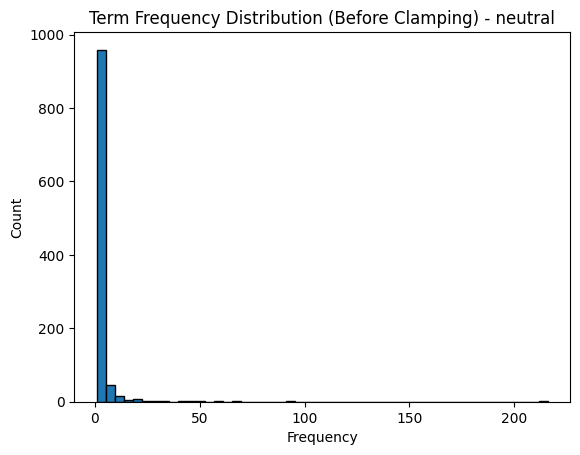

Sentiment: positive
Term Frequencies (Before Clamping): [1 1 1 ... 1 1 1]


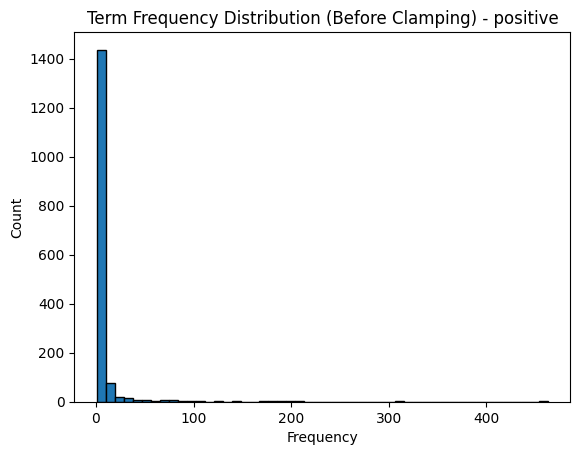

Sentiment: negative
Term Frequencies (Before Clamping): [ 1  1  1  1  2  1  1 33  7  1  1  4  1 13  3  3  1  1  1  1  1  1  2  1
  3  1  1  1  6  1  2  1  1  2  1  1  8  1 16  1  1  1  2  1  1  1 12  1
  1  2  3  8  5  1  1 27  1  1 10 22  1  2  1  1  1  1  1  2  1  1  1 14
  1  4  2  1  6  1  1  1  2  2  3  1  1  2  1 10  1  1  6  3  2  2  1  1
  1  1  2  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  6  1  1  1
  1  3  1  2  1  1  1  1  1  1  1  1  1  1  1  1  2  2  4  1  2  1  1  1
  6  1  2  1  1  1  1  1  1  4  1  2  3  1  1  1  1  1  1  9  1  1  5 10
  1  1  2  1  2  1  1  2  1  1  1  1  2  1  3  1  1  2  1  1  1  2  2  1
  1  4  1  1  1  2  1  2  1  1  1  1  1  2  1  1  1  2  1  1  1  1  7  1
  1  7  1  1  2  2  1  1  1  1  1  1  1  1  2  1  2  1  1  1  1  6  1  1
  1  1  6  7  3  3  4  1  1  3  1  1  2  4  1  1  1  4  1  4  4  1  4  6
  1  1  1  2  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1 16  1  1
  1  1  3  1  1  1  1  1  1  5  1  1  1  5  2  6  2  1  1  2  1  1  

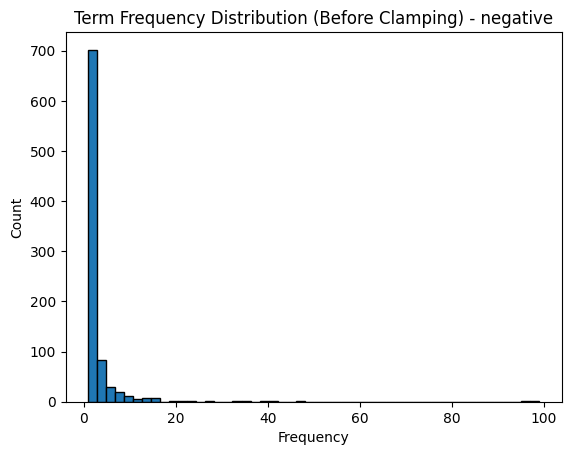

Sentiment: neutral
Term Frequencies (After Clamping): [3 1 1 ... 1 1 1]


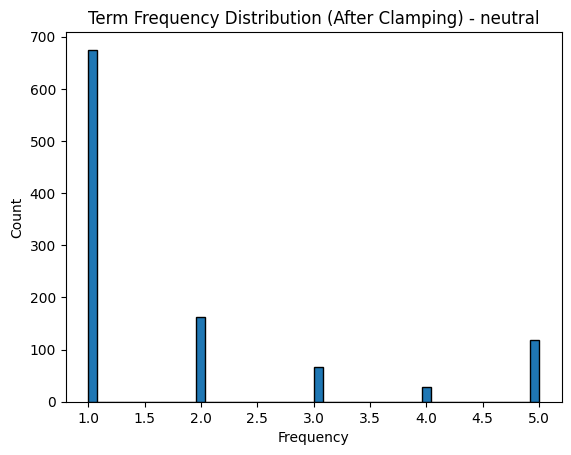

Sentiment: positive
Term Frequencies (After Clamping): [1 1 1 ... 1 1 1]


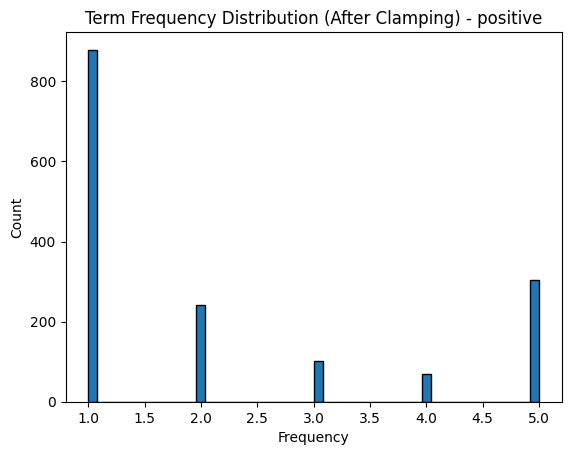

Sentiment: negative
Term Frequencies (After Clamping): [1 1 1 1 2 1 1 5 5 1 1 4 1 5 3 3 1 1 1 1 1 1 2 1 3 1 1 1 5 1 2 1 1 2 1 1 5
 1 5 1 1 1 2 1 1 1 5 1 1 2 3 5 5 1 1 5 1 1 5 5 1 2 1 1 1 1 1 2 1 1 1 5 1 4
 2 1 5 1 1 1 2 2 3 1 1 2 1 5 1 1 5 3 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 5 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 4 1 2 1 1 1 5 1 2 1
 1 1 1 1 1 4 1 2 3 1 1 1 1 1 1 5 1 1 5 5 1 1 2 1 2 1 1 2 1 1 1 1 2 1 3 1 1
 2 1 1 1 2 2 1 1 4 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 5 1 1 5 1 1 2 2
 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 5 1 1 1 1 5 5 3 3 4 1 1 3 1 1 2 4 1 1 1 4 1
 4 4 1 4 5 1 1 1 2 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 3 1 1 1 1 1
 1 5 1 1 1 5 2 5 2 1 1 2 1 1 3 1 1 1 1 1 5 3 1 1 1 2 1 4 1 1 3 4 1 3 1 1 1
 5 2 5 1 1 2 2 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 2 5 1 2 1 5 1 4 1
 1 3 5 5 1 1 1 1 1 2 1 4 1 1 2 1 1 1 1 1 2 1 1 1 1 2 5 1 2 1 1 1 4 1 1 2 1
 1 2 1 3 1 2 1 3 1 1 5 1 5 1 1 1 1 1 5 5 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 5 1 2 4 1 1 1 2 1 1 1 5 1 1 2 1 5 1 5 1 1 1 

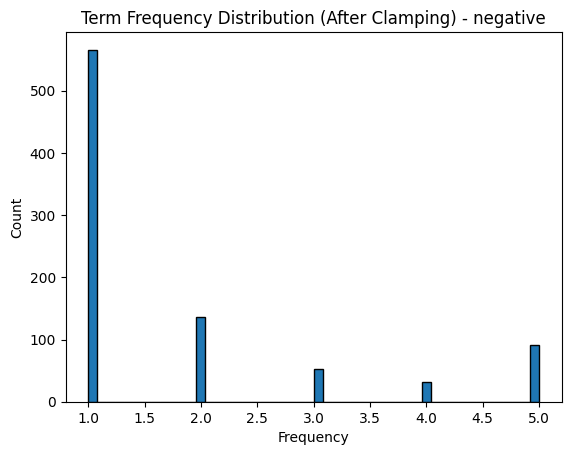

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み
data_path = './data/reviews_with_sentiment.csv'
df = pd.read_csv(data_path)

# 抽出する品詞の指定
POS = ['ADJ', 'ADV', 'INTJ', 'PROPN', 'NOUN', 'VERB']
MAX_TERMS_IN_DOC = 5
NGRAM = 1
MAX_DF = 1.0
MIN_DF = 0.0
NUM_VOCAB = 10000
TOP_K = 20
LAMBDA = 5  # クランプの閾値

# データの前処理（形態素解析、Bag-of-Wordsの生成など）を行う関数を定義
def preprocess_data(df):
    import spacy
    from sklearn.feature_extraction.text import CountVectorizer
    import itertools

    nlp = spacy.load('ja_ginza')

    def flatten(*lists) -> list:
        res = []
        for l in list(itertools.chain.from_iterable(lists)):
            for e in l:
                res.append(e)
        return res

    def remove_duplicates(l):
        d = {}
        for e in l:
            d[e[0]] = e[1]
        return list(d.items())

    df["doc"] = [nlp(review) for review in df["review"]]
    bows = {}
    cvs = {}

    for sentiment in df["sentiment"].unique():
        tokens = []
        for doc in df[df["sentiment"] == sentiment]["doc"]:
            similarities = [(token.similarity(doc), token.lemma_) for token in doc if token.pos_ in POS]
            similarities = remove_duplicates(similarities)
            similarities = sorted(similarities, key=lambda sim: sim[1], reverse=True)[:MAX_TERMS_IN_DOC]
            tokens.append([similarity[1] for similarity in similarities])

        cv = CountVectorizer(ngram_range=(1, NGRAM), max_df=MAX_DF, min_df=MIN_DF, max_features=NUM_VOCAB)
        bows[sentiment] = cv.fit_transform(flatten(tokens)).toarray()
        cvs[sentiment] = cv

    return bows, cvs

bows, cvs = preprocess_data(df)

# クランプ前のデータの範囲と頻度を確認
term_frequencies = {}
for sentiment in df["sentiment"].unique():
    bow = bows[sentiment]
    term_frequency = np.sum(bow, axis=0)
    term_frequencies[sentiment] = term_frequency

    print(f"Sentiment: {sentiment}")
    print(f"Term Frequencies (Before Clamping): {term_frequency}")

    # ヒストグラムをプロット
    plt.hist(term_frequency, bins=50, edgecolor='black')
    plt.title(f'Term Frequency Distribution (Before Clamping) - {sentiment}')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.show()

# クランプ処理を適用
clamped_term_frequencies = {}
for sentiment, term_frequency in term_frequencies.items():
    clamped_term_frequency = np.clip(term_frequency, -LAMBDA, LAMBDA)
    clamped_term_frequencies[sentiment] = clamped_term_frequency

    print(f"Sentiment: {sentiment}")
    print(f"Term Frequencies (After Clamping): {clamped_term_frequency}")

    # ヒストグラムをプロット
    plt.hist(clamped_term_frequency, bins=50, edgecolor='black')
    plt.title(f'Term Frequency Distribution (After Clamping) - {sentiment}')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.show()
